In [1]:
%matplotlib inline

In [2]:
import orca
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.grid"] = True
plt.rcParams["font.family"] = "sans-serif" # "serif"

# Plot Valence bands

This notebook shows how to plot the valence band of a molecule from a QM calculations with Orca and the contribution of each element in the molecule.

## Load Orca output file

In [3]:
filename = "input.out"
out = orca.OrcaOutfile(filename)

In [4]:
om_up = out.mo_energies[orca.Spin.up]
if out.is_spin:
    om_down = out.mo_energies[orca.Spin.down]

## Plot the valence band spectra

You have to chose `emin` and `emax`.

In [5]:
ih, homo = out.homo
print(f"HOMO = MO_{ih:d} = {homo:8.4f} ua = {homo * 27.212:8.4f} eV")

HOMO = MO_20 =  -0.2205 ua =  -6.0013 eV


In [6]:
il, lumo = out.lumo
print(f"LUMO = MO_{ih:d} = {lumo:8.4f} ua = {lumo * 27.212:8.4f} eV")

LUMO = MO_20 =   0.0536 ua =   1.4576 eV


OM_8   =  -20.313 eV
OM_9   =  -18.359 eV
OM_10  =  -18.355 eV
OM_11  =  -14.184 eV
OM_12  =  -11.673 eV
OM_13  =  -11.382 eV
OM_14  =  -11.376 eV
OM_15  =  -10.690 eV
OM_16  =  -10.683 eV
OM_17  =  -10.341 eV
OM_18  =   -8.752 eV
OM_19  =   -8.750 eV
OM_20  =   -6.001 eV
OM_21  =    1.458 eV
OM_22  =    1.775 eV
OM_23  =    1.783 eV
OM_24  =    2.661 eV


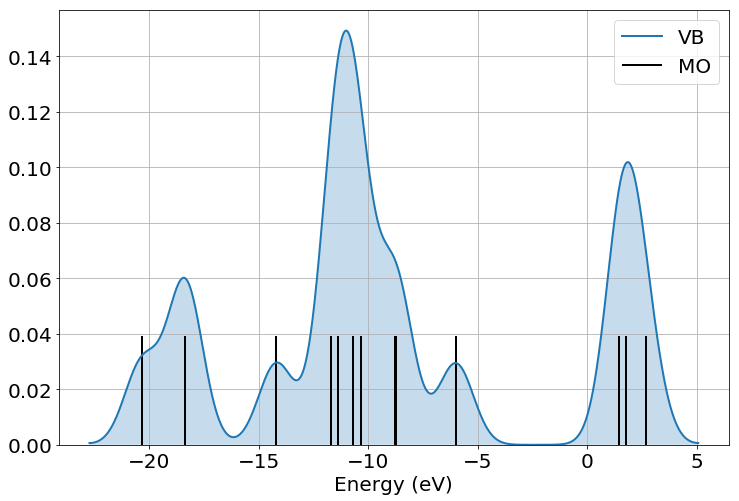

In [7]:
# select OM between emin and emaw
emin = -2  # ua
emax = 0.1   # ua
idx, = np.where((emin <= om_up) & (om_up <= emax))

# convert to eV and print selected values
bv_om = om_up[idx] * 27.212
print("\n".join([f"OM_{i:<3d} = {om_up[i] * 27.212:8.3f} eV" for i in idx]))

ax = sns.distplot(bv_om, hist=False, rug=True,
                  axlabel="Energy (eV)",
                  kde_kws=dict(gridsize=1000, shade=True, bw=.8, label="VB", linewidth=2),
                  rug_kws=dict(height=.25, linewidth=2, color="k", label="MO"))
plt.legend();

## MO coefficients

In [8]:
df = out.mo_dataframe[orca.Spin.up]
df.head()

MO_1      MO_2      MO_3      MO_4      MO_5  \
iat Element AO  shell                                                     
0   P       1s  s      0.994492  0.000036 -0.000040  0.000049  0.300449   
            2s  s     -0.021122  0.000270 -0.000303  0.000373  1.019852   
            3s  s     -0.011267  0.000611 -0.000686  0.000845 -0.055175   
            4s  s      0.012268 -0.006475  0.007282 -0.008971  0.037065   
            1pz p      0.000175 -0.000127 -0.000041 -0.000188 -0.006909   

                           MO_6      MO_7      MO_8      MO_9     MO_10  \
iat Element AO  shell                                                     
0   P       1s  s      0.000010  0.000010  0.003302 -0.041071  0.000065   
            2s  s      0.000038  0.000036  0.012152 -0.252059  0.000401   
            3s  s      0.000042  0.000021  0.009417 -0.350484  0.000296   
            4s  s     -0.000140 -0.000073 -0.031702 -0.166156  0.001657   
            1pz p     -0.189285 -0.675082  0.688840  0.029027  0.017769   

                         ...        MO_96     MO_97     MO_98     MO_99  \
iat Element AO  shell    ...                                              
0   P       1s  s        ...     0.001065  0.004152  0.000036  0.000011   
            2s  s        ...     0.009142  0.027751  0.000233  0.000070   
            3s  s        ...     0.126136 -0.070267 -0.000554 -0.000081   
            4s  s        ...    -0.507815  0.618169  0.004319  0.000605   
            1pz p        ...     0.006974 -0.014475  0.009773 -0.022646   

                         MO_100    MO_101    MO_102    MO_103    MO_104  \
iat Element AO  shell                                                     
0   P       1s  s      0.000804  0.000052  0.000030  0.000007  0.000005   
            2s  s      0.007282  0.000473  0.000280  0.000069  0.000041   
            3s  s      0.166190  0.010440  0.006034  0.000433  0.000358   
            4s  s     -0.798052 -0.049006 -0.026596  0.001237 -0.000638   
            1pz p     -0.006062 -0.005493  0.000492 -0.000033  0.002330   

                         MO_105  
iat Element AO  shell            
0   P       1s  s      0.000010  
            2s  s      0.000085  
            3s  s      0.000970  
            4s  s     -0.003008  
            1pz p     -0.000682  

[5 rows x 105 columns]

Print coefficient on atom 0 in the HOMO:

In [9]:
df.loc[(0), "MO_20"]

Element  AO      shell
P        1s      s        0.000022
         2s      s        0.000147
         3s      s        0.000632
         4s      s       -0.001590
         1pz     p       -0.082270
         1px     p        0.051543
         1py     p       -0.115349
         2pz     p        0.150687
         2px     p       -0.094431
         2py     p        0.211173
         3pz     p        0.107297
         3px     p       -0.066905
         3py     p        0.151357
         1dz2    d        0.033224
         1dxz    d       -0.058705
         1dyz    d        0.022855
         1dx2y2  d        0.008993
         1dxy    d       -0.028807
Name: MO_20, dtype: float64

## Contribution of each elements

The idea there is to plot on the valence band, the contribution of each element.

Compute the square of MO coefficient, group by element and sum over them. Normalization is done by dividing the sum of squares. 

In [10]:
df_el_contrib = (df**2).groupby("Element").sum() / (df**2).sum(axis=0)
df_el_contrib = df_el_contrib.transpose()
df_el_contrib.head()

Element         C         H         P
MO_1     0.000020  0.000002  0.999979
MO_2     0.999690  0.000252  0.000058
MO_3     0.999682  0.000249  0.000070
MO_4     0.999662  0.000240  0.000098
MO_5     0.000079  0.000019  0.999903

`idx` contains the indexes of selected MO.

In [11]:
print(idx)

[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [12]:
df_el_contrib.iloc[idx]

Element         C         H             P
MO_9     0.455306  0.109409  4.352847e-01
MO_10    0.722850  0.239256  3.789423e-02
MO_11    0.722966  0.239129  3.790529e-02
MO_12    0.219813  0.130559  6.496283e-01
MO_13    0.466351  0.441055  9.259387e-02
MO_14    0.499076  0.421095  7.982949e-02
MO_15    0.497919  0.421517  8.056400e-02
MO_16    0.503682  0.470625  2.569297e-02
MO_17    0.504041  0.470794  2.516462e-02
MO_18    0.483468  0.516531  6.907770e-07
MO_19    0.561766  0.200216  2.380182e-01
MO_20    0.561681  0.199869  2.384505e-01
MO_21    0.197757  0.096037  7.062061e-01
MO_22    0.619050  0.373534  7.415819e-03
MO_23    0.638484  0.207992  1.535241e-01
MO_24    0.638307  0.208314  1.533787e-01
MO_25    0.284163  0.659192  5.664518e-02

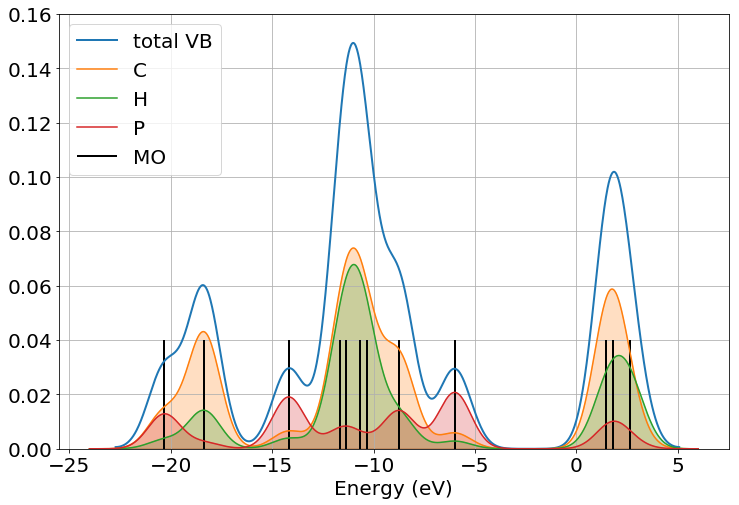

In [13]:
gridsize = 1000
bw = .8
emin = -24  # eV
emax = 6 # eV
e = np.linspace(emin, emax, gridsize)

# plot total VB
ax = sns.distplot(bv_om, hist=False, rug=True,
                  axlabel="Energy (eV)",
                  kde_kws=dict(gridsize=gridsize, shade=False, bw=bw, label="total VB", linewidth=2),
                  rug_kws=dict(height=.25, linewidth=2, color="k", label="MO"))

# compute integral of the VB
kde = np.zeros(gridsize)
for om in bv_om:
    kde += norm.pdf(e, loc=om, scale=.8)
int_kde = np.trapz(kde, e)

# plot contributions of each atoms
for i, el in enumerate(df_el_contrib, 1):
    kde = np.zeros(gridsize)
    for om, c in zip(bv_om, df_el_contrib.iloc[idx][el].values):
        kde += c * norm.pdf(e, loc=om, scale=.8)

    plt.plot(e, kde / int_kde, label=el, color=f"C{i}")
    plt.fill_between(e, kde / int_kde, color=f"C{i}", alpha=.25)

plt.ylim(0, 0.16)
plt.legend();

In [6]:
plt.fill_betweenx?